In [1]:
import pandas as pd
import sklearn.datasets as d
# breast_cancer 데이터 셋 로드
x = d.load_breast_cancer()
cancer = pd.DataFrame(data = x.data, columns = x.feature_names)
cancer['target'] = x.target

cancer.info()
cancer.describe()
cancer.target.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

target
1    357
0    212
Name: count, dtype: int64

In [2]:
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate

# 'cancer'가 데이터셋을 포함하는 DataFrame이라고 가정
X = cancer.drop('target', axis=1)  # 특성
y = cancer['target']               # 타겟 변수

# 선형 커널을 사용한 SVM
svm_clf = svm.SVC(kernel='linear')

# 교차 검증
scores = cross_val_score(svm_clf, X, y, cv=5)
print(scores)

results = cross_validate(svm_clf, X, y, cv=5)
print(pd.DataFrame(results))

print('평균 교차 검증 점수:', scores.mean())

[0.94736842 0.92982456 0.97368421 0.92105263 0.95575221]
   fit_time  score_time  test_score
0  0.514329    0.001001    0.947368
1  1.225888    0.002001    0.929825
2  0.795131    0.002001    0.973684
3  0.421621    0.002001    0.921053
4  0.685238    0.002001    0.955752
평균 교차 검증 점수: 0.9455364073901569


In [3]:
# SVM, kernel = 'rbf'로 비선형분리 진행
 
svm_clf =svm.SVC(kernel = 'rbf')

# 교차검증

scores = cross_val_score(svm_clf, X, y, cv = 5)
scores

pd.DataFrame(cross_validate(svm_clf, X, y, cv =5))

print('교차검증 평균: ', scores.mean())

교차검증 평균:  0.9121720229777983


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.svm as svm
from sklearn.model_selection import cross_val_score, cross_validate
import pandas as pd

# 'cancer'가 데이터셋을 포함하는 DataFrame이라고 가정합니다.
X = cancer.iloc[:, :-1]  # 특성
y = cancer.iloc[:, -1]   # 타겟 변수

# StandardScaler 적용
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# 변환된 X로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.3, random_state=100)

# SVM, kernel = 'linear'로 선형분리 진행
svm_clf = svm.SVC(kernel='linear', random_state=100)

# 변환된 X로 교차검증
scores = cross_val_score(svm_clf, X_scaled, y, cv=5)
print('변환된 X로 교차검증:', scores)

results = cross_validate(svm_clf, X_scaled, y, cv=5)
print(pd.DataFrame(results))

print('교차검증 평균: ', scores.mean())


변환된 X로 교차검증: [0.95614035 0.98245614 0.96491228 0.96491228 0.98230088]
   fit_time  score_time  test_score
0  0.002004    0.001002    0.956140
1  0.002004    0.001010    0.982456
2  0.003006    0.000000    0.964912
3  0.002002    0.000000    0.964912
4  0.003192    0.000502    0.982301
교차검증 평균:  0.9701443875174661


In [5]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'linear',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


,C,mean_test_score
3,1.000,0.974873
1,0.010,0.969778
2,0.100,0.969778
4,10.000,0.957310
5,25.000,0.957278
6,50.000,0.957278
7,100.000,0.957278
0,0.001,0.947120


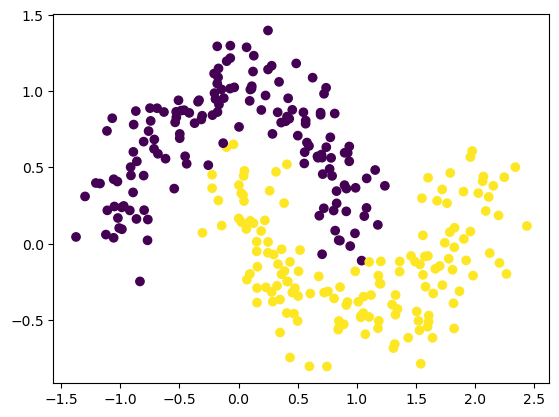

In [6]:
import sklearn.datasets as d
import matplotlib.pyplot as plt

X, y = d.make_moons(n_samples=300, noise=0.16, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


In [7]:
from sklearn.model_selection import train_test_split
import sklearn.svm as svm
import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate
import pandas as pd

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# SVM, kernel = 'linear'로 선형 분리 진행
svm_clf_linear = svm.SVC(kernel='linear', random_state=100)

# 교차 검증
scores_linear = cross_val_score(svm_clf_linear, X, y, cv=5)
print('교차 검증 평균 (linear kernel):', scores_linear.mean())

# SVM, kernel = 'rbf'로 비선형 분리 진행
svm_clf_rbf = svm.SVC(kernel='rbf')

# 교차 검증
scores_rbf = cross_val_score(svm_clf_rbf, X, y, cv=5)
print('교차 검증 평균 (rbf kernel):', scores_rbf.mean())

교차 검증 평균 (linear kernel): 0.86
교차 검증 평균 (rbf kernel): 0.97


In [8]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

svm_clf = svm.SVC(kernel = 'rbf',random_state=100)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 25, 50, 100],
             'gamma':[0.001, 0.01, 0.1, 1, 10, 25, 50, 100]}

grid_svm = GridSearchCV(svm_clf,
                      param_grid = parameters, cv = 5)

grid_svm.fit(X_train, y_train)

result = pd.DataFrame(grid_svm.cv_results_['params'])
result['mean_test_score'] = grid_svm.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)


,C,gamma,mean_test_score
20,0.100,10.000,0.980952
35,10.000,1.000,0.976190
27,1.000,1.000,0.976190
28,1.000,10.000,0.971429
43,25.000,1.000,0.966667
...,...,...,...
17,0.100,0.010,0.519048
22,0.100,50.000,0.519048
23,0.100,100.000,0.519048
24,1.000,0.001,0.519048
